# Прогнозирование текучести кадров компании

## Цель :

<font size='4'> 
- анализ данных; <br>
- прогноз оттока сотрудников компании; <br>
- заключительные выводы и рекомендации HR-отделу. </font>

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
%matplotlib inline

In [51]:
data = pd.read_csv('HR.csv')
data.head(80)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
75,0.11,0.79,7,306,4,0,1,0,product_mng,medium
76,0.10,0.83,6,295,4,0,1,0,product_mng,medium
77,0.40,0.54,2,137,3,0,1,0,marketing,medium
78,0.43,0.56,2,157,3,0,1,0,sales,low


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- satisfaction level - уровень удовлетворенности сотрудника;
- last_evaluation - оценка работодателя, находящаяся в диапазоне от 0 до 1;
- number_project - кол-во выполненных проектов;
- average_montly_hours - ср. кол-во рабочих часов за месяц;
- time_spend_company - время работы в компании в годах;
- Work_accident - был ли несчастный случай на рабочем месте (0 - no, 1- yes) ;
- left - работник уволился (0 - нет, 1 - да);
- promotion_last_5years - было повышение за последние 5 лет (0 - n.p. 1- was promoted);
- sales - отдел, где работает сотрудник;
- salary - уровень зп.



## EDA (Разведочный анализ данных)

In [53]:
data.describe().applymap('{:,.1f}'.format)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,"14,999.0","14,999.0","14,999.0","14,999.0","14,999.0","14,999.0","14,999.0","14,999.0"
mean,0.6,0.7,3.8,201.1,3.5,0.1,0.2,0.0
std,0.2,0.2,1.2,49.9,1.5,0.4,0.4,0.1
min,0.1,0.4,2.0,96.0,2.0,0.0,0.0,0.0
25%,0.4,0.6,3.0,156.0,3.0,0.0,0.0,0.0
50%,0.6,0.7,4.0,200.0,3.0,0.0,0.0,0.0
75%,0.8,0.9,5.0,245.0,4.0,0.0,0.0,0.0
max,1.0,1.0,7.0,310.0,10.0,1.0,1.0,1.0


In [54]:
data.describe(include=object)

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


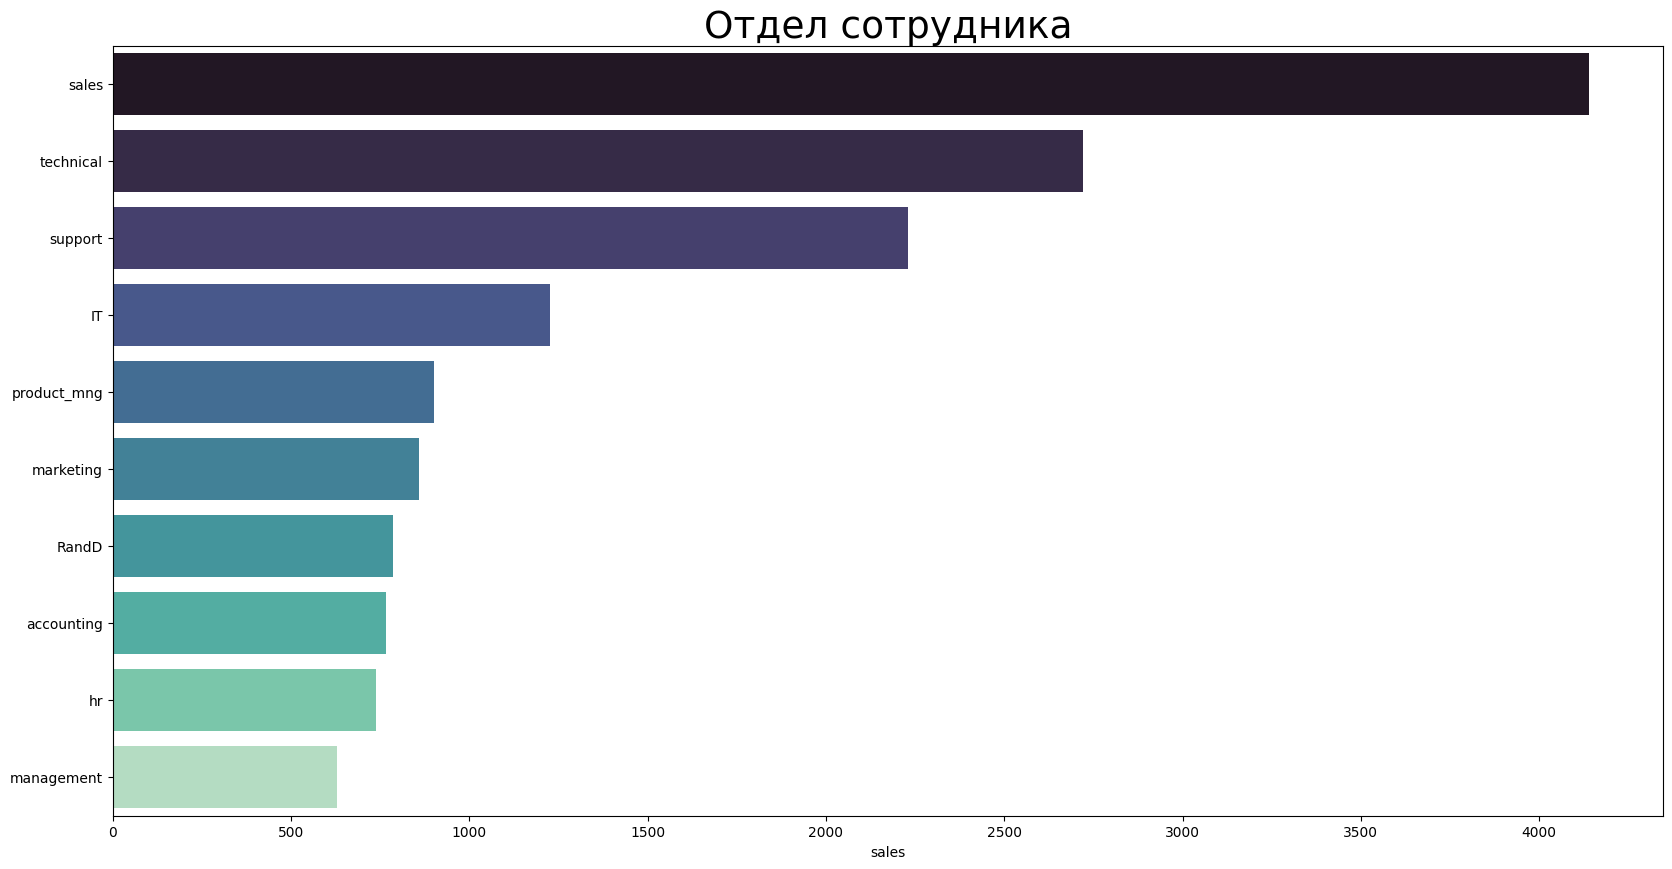

In [55]:
# info on deps of employees

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=data['sales'].value_counts(),y=data['sales'].value_counts().index, orient='h',palette='mako')
# sns.set(font_scale=3)
plt.title('Отдел сотрудника', fontsize=27)
plt.show();

<font size='4'> * Бо́льшее количество сотрудников работает в отделе продаж (27% от общего числа). </font>

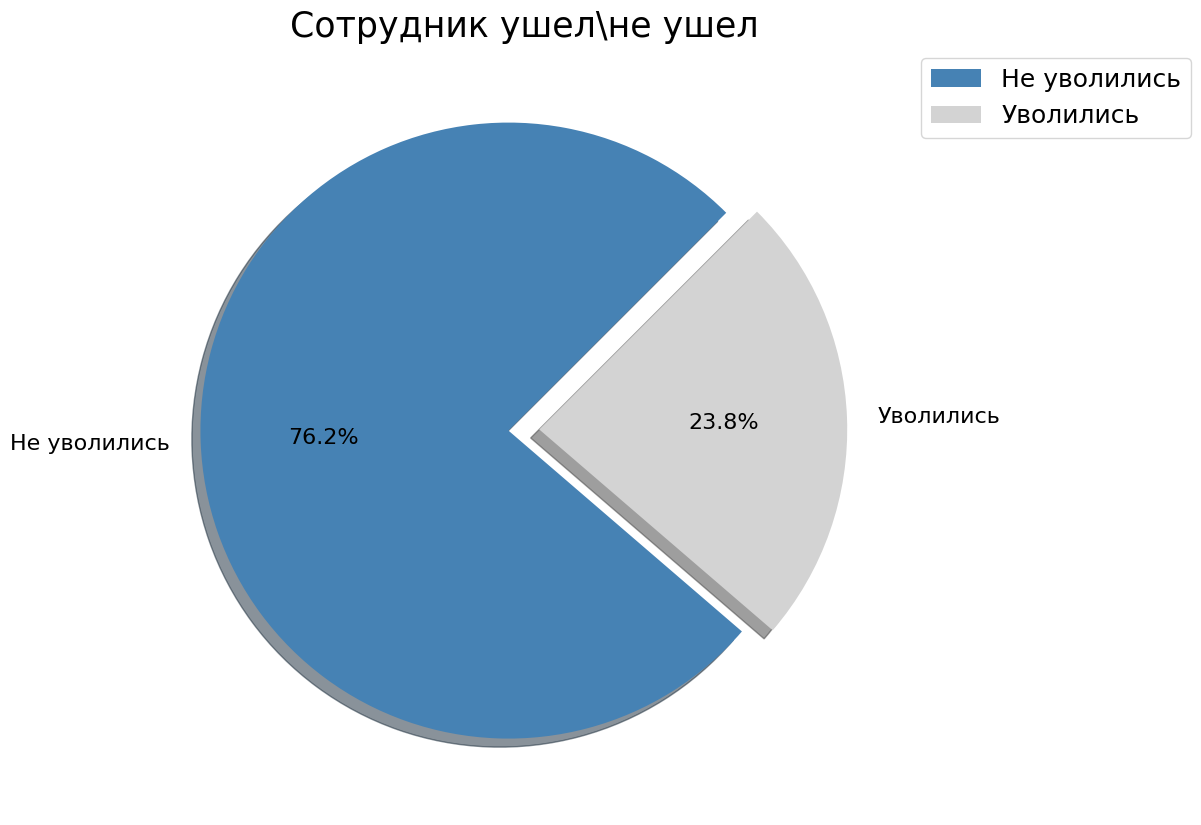

In [56]:
#pie chart to show non/left employees

fig, ax = plt.subplots(figsize=(20,10))
c=['steelblue','lightgray']
plt.pie(data['left'].value_counts(), labels=['Не уволились','Уволились'], explode=[0.05, 0.05], 
        autopct = '%1.1f%%', shadow=True, startangle= 45, colors=c, counterclock=True,textprops={'fontsize': 16})
plt.title('Сотрудник ушел\не ушел', fontsize=25)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=18)
plt.show();

<font size='4'> 
* 24% от общего числа сотрудников составляют уволившиеся сотрудники. <br>
* Причин для увольнения сотрудников может быть множество. Давайте разберем кто они? Какие факторы могли повлиять на то, что сотрудник решил уйти из компании.</font>



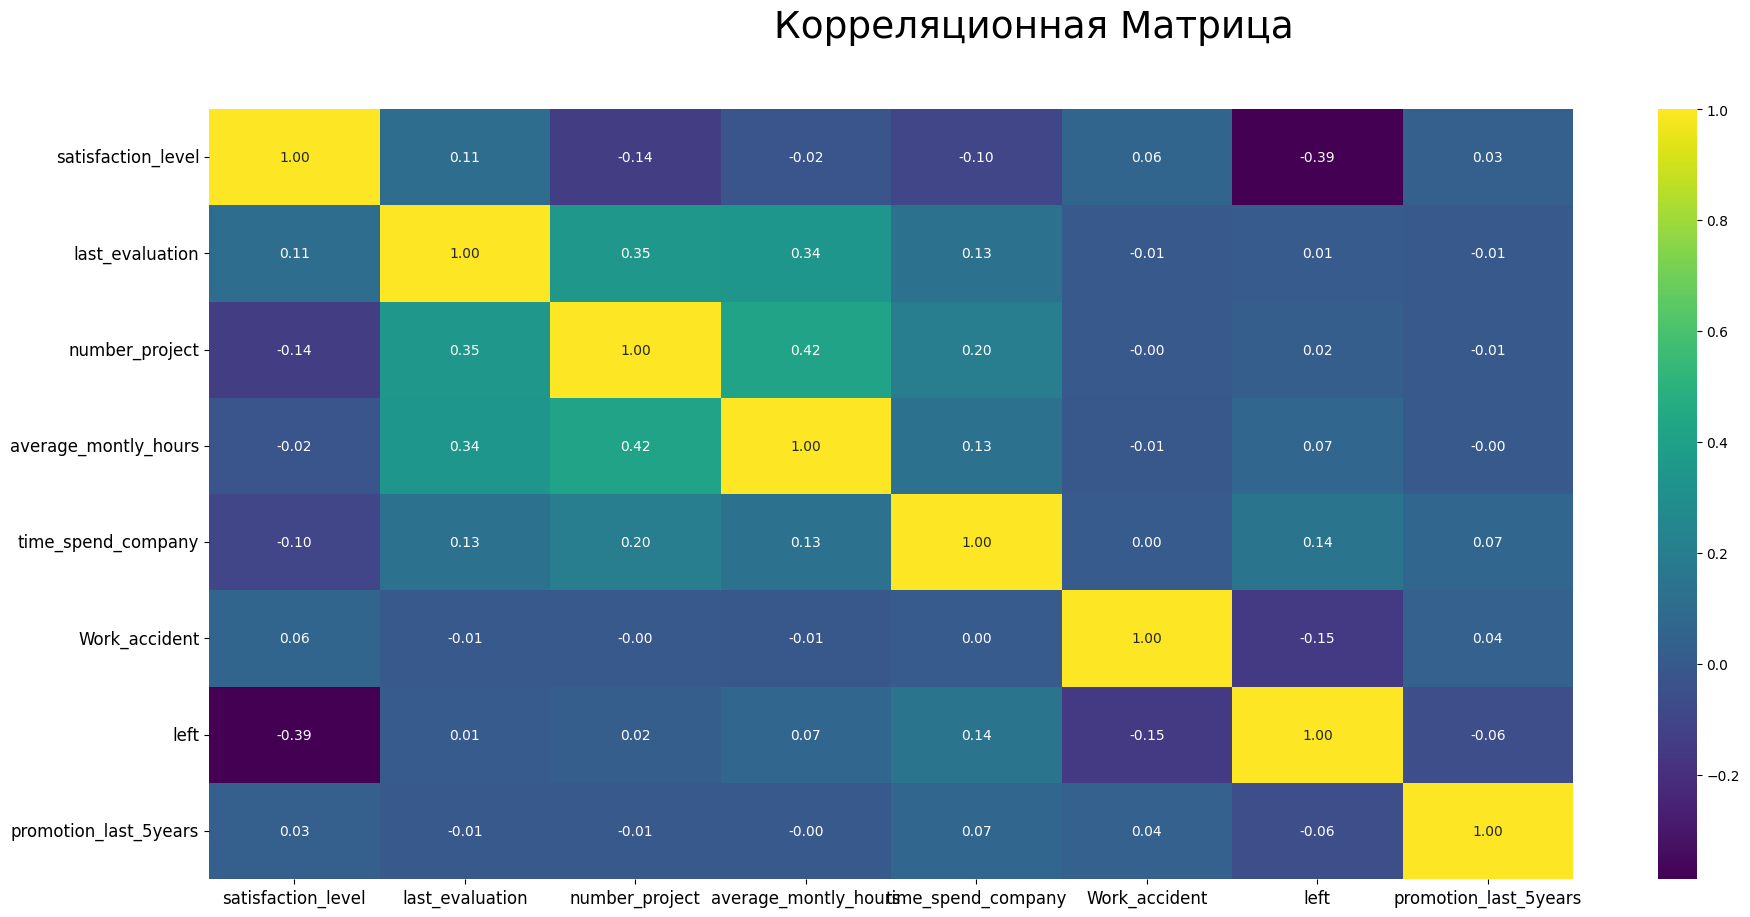

In [57]:
#correlation matrix 

fig, ax = plt.subplots(figsize=(22, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax, cmap='viridis')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.suptitle('Корреляционная Матрица', fontsize=27);

<font size='4'> 
    Выводы по Корреляционной Матрице: <br> <br>  
- Чем больше проектов, тем большее количество часов сотрудник тратит на его выполнение; <br> 
- Чем больше выполняемых проектов, тем больше сотрудник находится в компании; <br> 
- Чем больше проектов, тем большее работодатель удовлетворен сотрудником. <br> 
- Чем больше сотрудник не удовлетворен компанией\работодателем, тем выше шанс, что он уволится. Чтобы проверить данную гипотезу, ниже будут приведены примеры; <br> <br> 
     Пройдемся дальше, чтобы убедиться в наших выводах.</font>
    
  

In [58]:
df_yes = data.loc[data['left']==1]
df_no = data.loc[data['left']==0]

In [59]:
#info on projects by (non)fired employees

temp = data.groupby(['number_project','left']).count()['sales']
pcts = temp.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack()
pcts.fillna(0,inplace=True)
pcts=pcts.rename(columns={0:'Не уволился',1:'Уволился'})

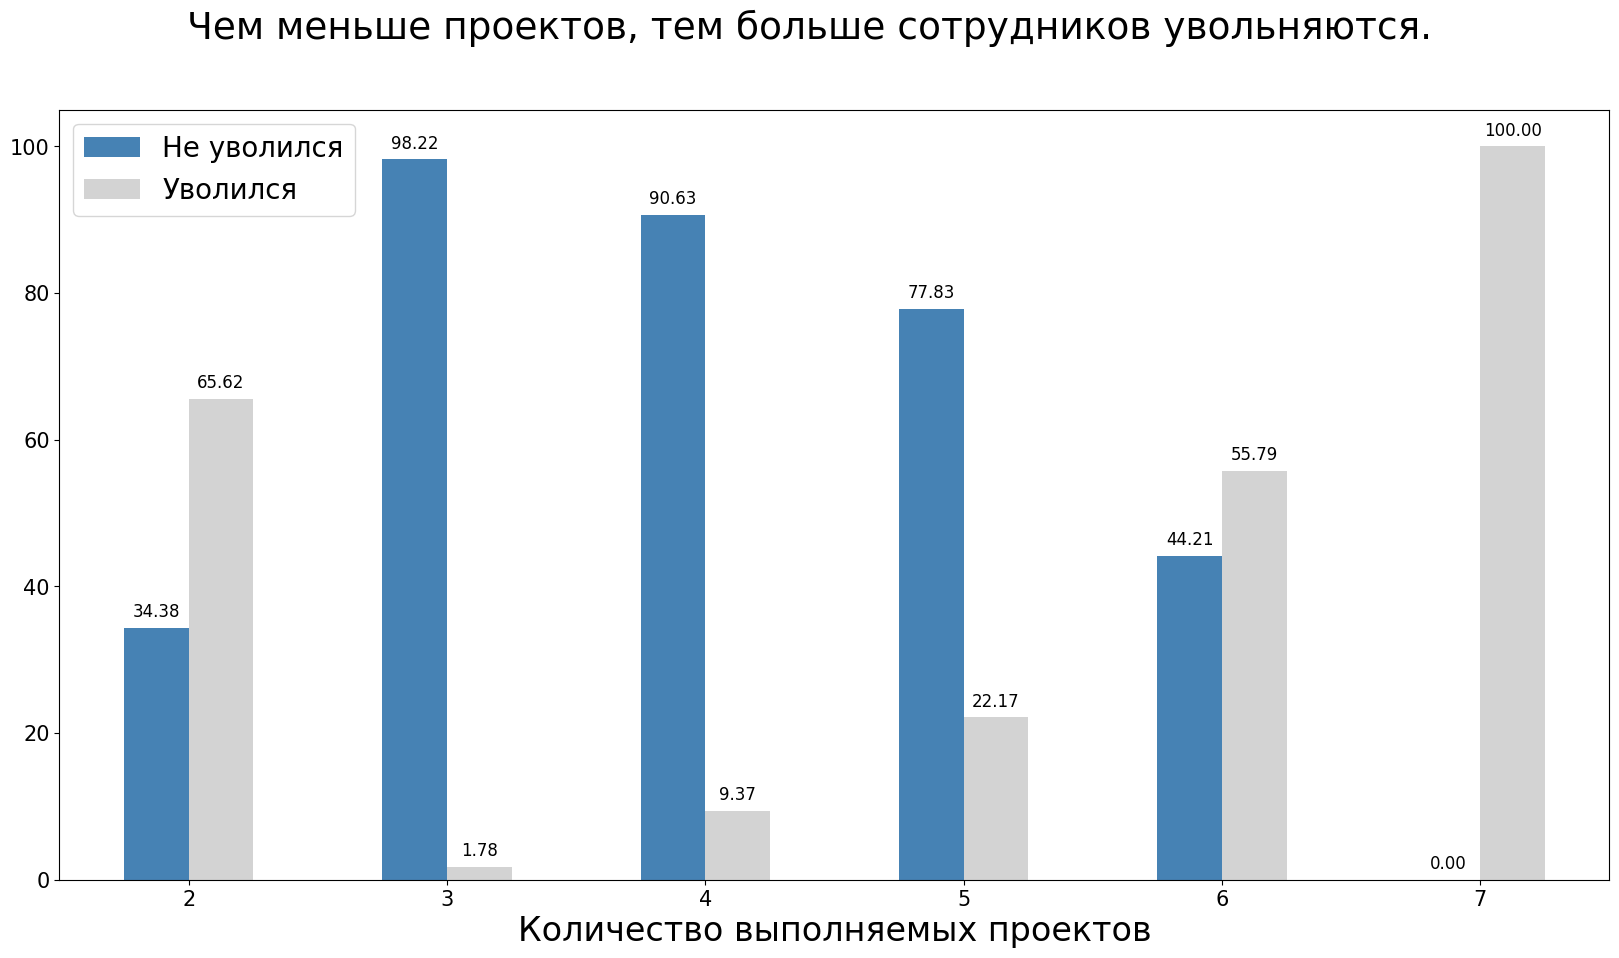

In [60]:
p1 = pcts.plot(kind='bar', figsize=(20,10), rot=0, fontsize=15, color=['steelblue','lightgray'])
plt.suptitle('Чем меньше проектов, тем больше сотрудников увольняются.', fontsize=27)
plt.xlabel('Количество выполняемых проектов', fontsize=24)
plt.legend(fontsize=20)
for p in p1.containers:
    p1.bar_label(p, fmt='%.2f', label_type='edge', padding=5, size=12)

 ### Выводы:  <br>
 <font size='4'>
- 43% ушедших сотрудников выполняли по 2 проекта; <br> 
- Все, кто выполняли по 7 проектов, ушли с работы (их количество составляет 7%). <br><br>
Рассмотрим более детально на тех, кто выполнял минимальное кол-во проектов. </font>

In [61]:
# data[(data['time_spend_company']==3)&(data['left']==1)&(data['satisfaction_level']>=0.4)&(data['number_project']==2)] #most of those who left comp, r not satisfied by theor company..

In [62]:
# data[(data['time_spend_company']==3)&(data['left']==1)&(data['promotion_last_5years']==0)&(data['number_project']==2)] #most of those who left comp, r not satisfied by theor company..

In [63]:
temp1 = data.loc[data['number_project']==2]
temp_left = temp1.loc[temp1['left']==1]
temp_noleft = temp1.loc[temp1['left']==0]

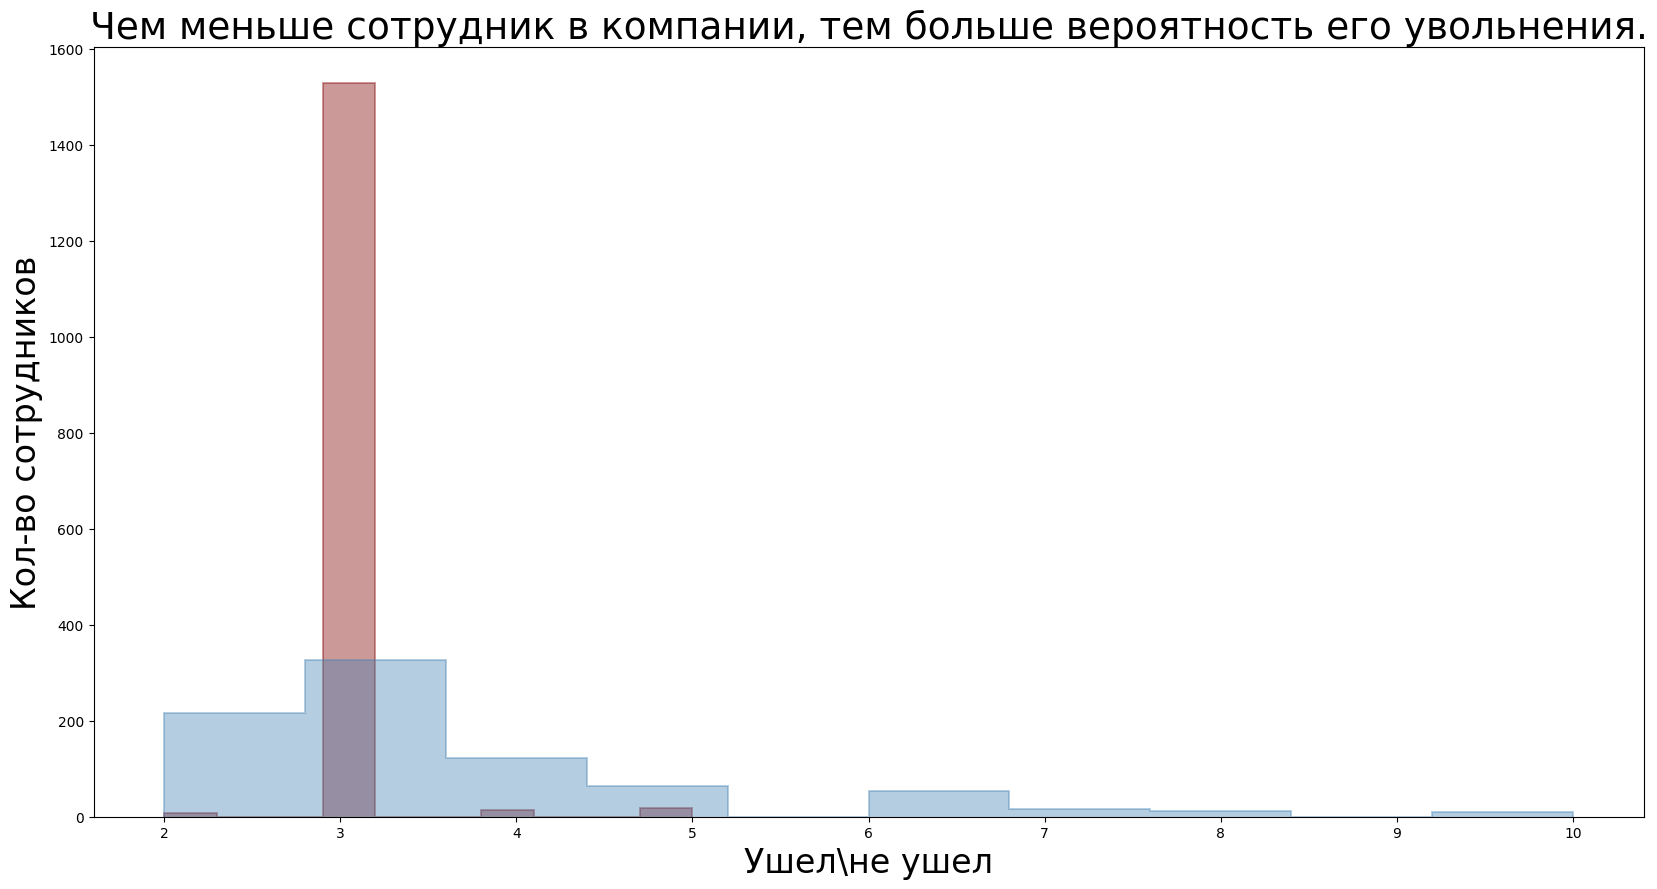

In [64]:
#this chart shows how many years employees with 2 projects work in a company

fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.hist(temp_left['time_spend_company'], fill=True,bins=10,color='maroon',edgecolor='maroon', histtype='step',linewidth=1.4, alpha=0.4)
ax.hist(temp_noleft['time_spend_company'], fill=True,bins=10,color='steelblue',edgecolor='steelblue', histtype='step',linewidth=1.4, alpha=0.4)
plt.title('Чем меньше сотрудник в компании, тем больше вероятность его увольнения.', fontsize=27)
plt.xlabel('Ушел\не ушел', fontsize=24)
plt.ylabel('Кол-во сотрудников', fontsize=24);


<font size='4'>
    В нашем датасете нет никого, кто проработал больше 6 лет, выполняя при этом по 2 проекта и ушел из  компании. <br><br>
    Основные показатели у тех, кто проработал 3 года: <br> <br>
- Неудовлетворенность работой; <br>
- Отсутствие продвижения на работе (лишь 12 сотрудников из 1516 имели продвижение). </font>

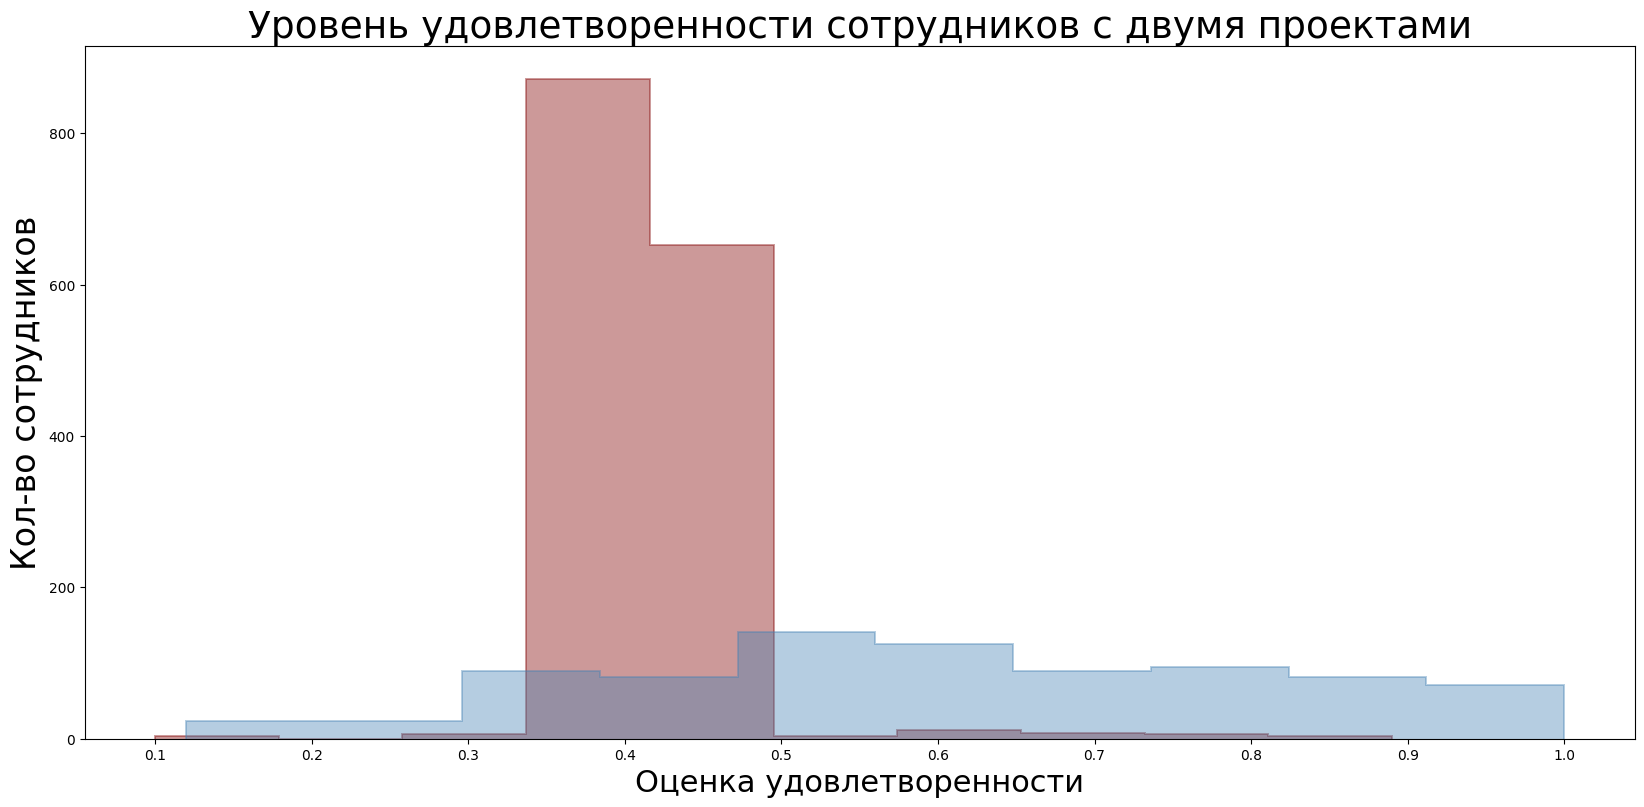

In [65]:
#this chart shows the satisfaction level of those who have only 2 projects

xlim=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

fig, ax = plt.subplots(1,1,figsize=(20,9))
ax.hist(temp_left['satisfaction_level'], fill=True,bins=10,color='maroon',edgecolor='maroon', histtype='step',linewidth=1.4, alpha=0.4)
ax.hist(temp_noleft['satisfaction_level'], fill=True,bins=10,color='steelblue',edgecolor='steelblue', histtype='step',linewidth=1.4, alpha=0.4)
plt.title('Уровень удовлетворенности сотрудников с двумя проектами', fontsize=27)
plt.xlabel('Оценка удовлетворенности', fontsize=22)
plt.ylabel('Кол-во сотрудников', fontsize=24)
plt.xticks(xlim);


<font size='4'> В среднем уровень удовлетворенности всех сотрудников составляет 61%. Однако, если мы углубимся, то заметим, что среди неуволившихся  средний показатель удовлетворенности составляет - 67%, а среди уволившихся - 44%. </font>

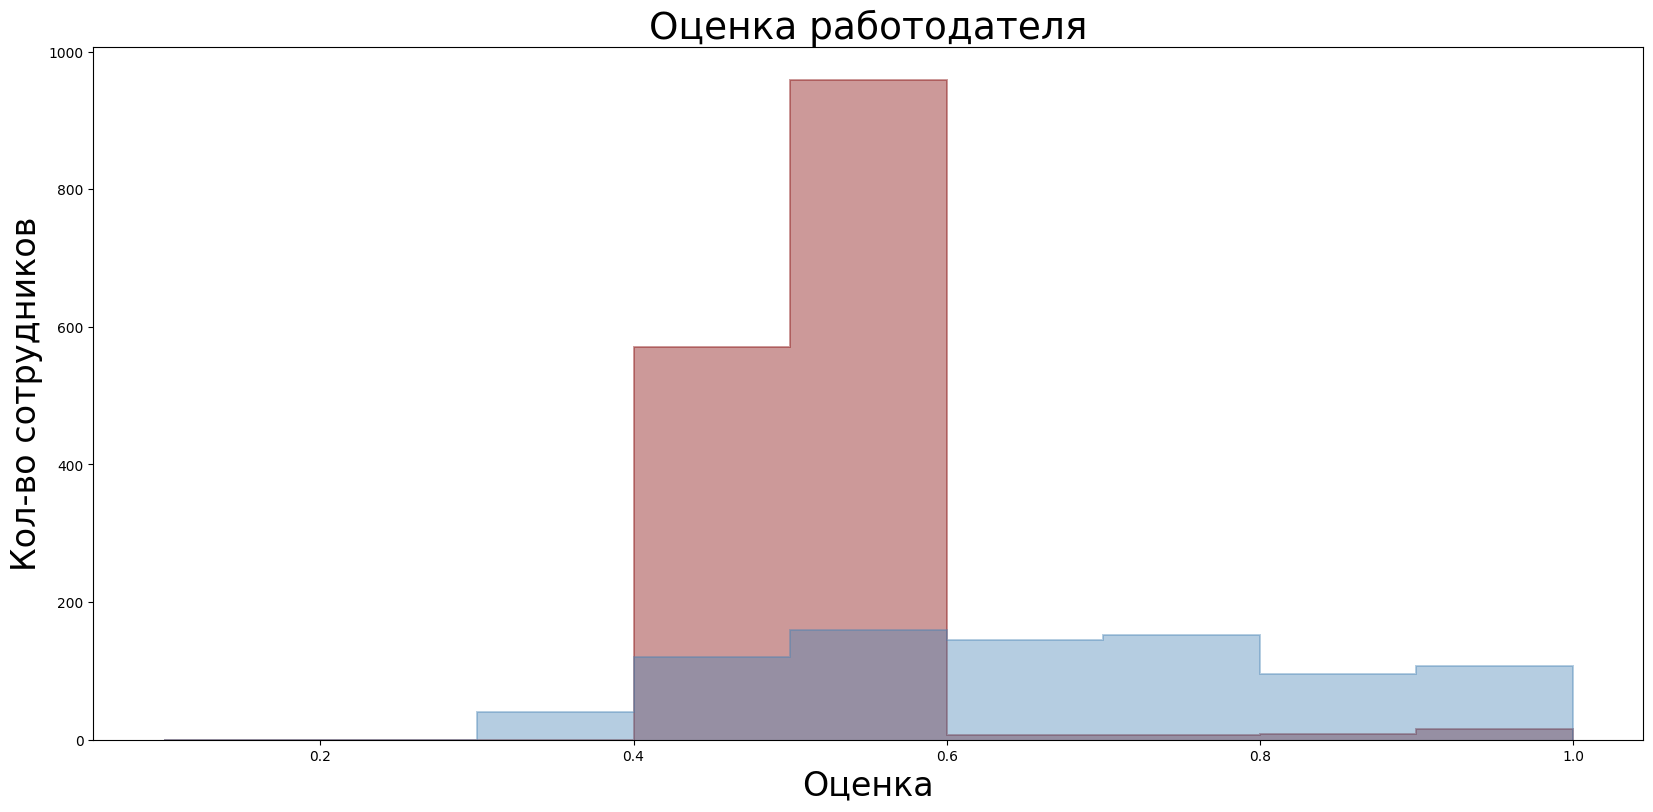

In [66]:
#this chart shows the satisfaction of empl of those who have only 2 projects


fig, ax = plt.subplots(1,1,figsize=(20,9))
ax.hist(temp_left['last_evaluation'], fill=True,bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],color='maroon',edgecolor='maroon', histtype='step',linewidth=1.4, alpha=0.4)
ax.hist(temp_noleft['last_evaluation'], fill=True,bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],color='steelblue',edgecolor='steelblue', histtype='step',linewidth=1.4, alpha=0.4)
plt.title('Оценка работодателя', fontsize=27)
plt.xlabel('Оценка', fontsize=24)
plt.ylabel('Кол-во сотрудников', fontsize=24);

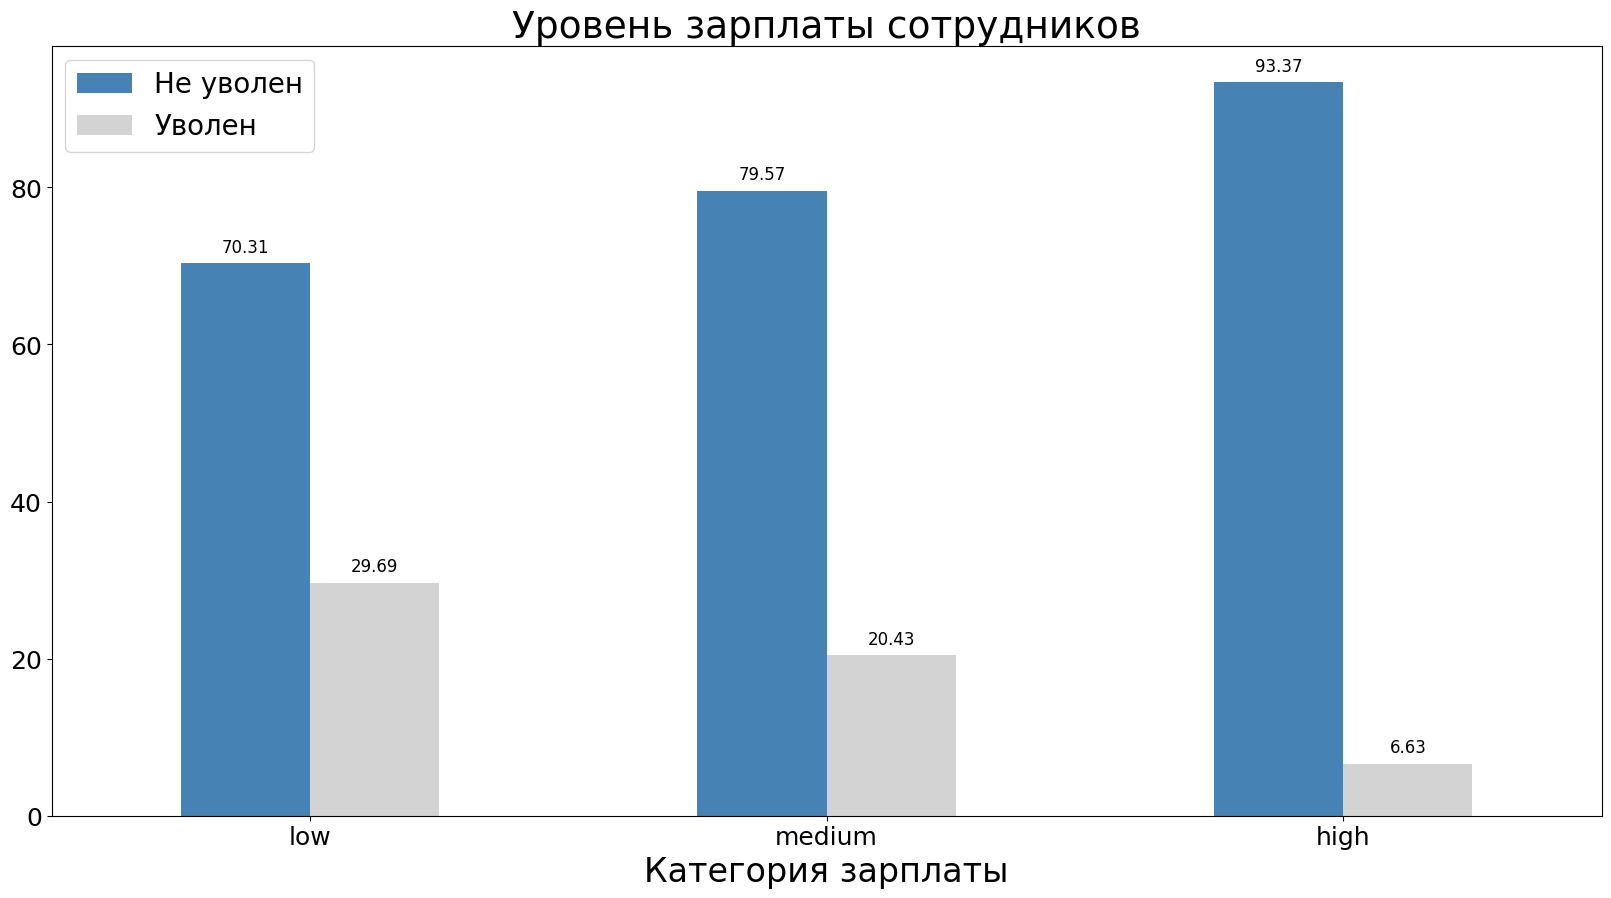

In [67]:
#salary of employees
salary = data.groupby(['salary','left']).count()['sales']
percent = salary.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).unstack()
percent=percent.rename(columns={0:'Не уволен',1:'Уволен'})
percent=percent.T[['low','medium','high']].T
salary1 = percent.plot(kind='bar', figsize=(20,10), rot=0, fontsize=18, color=['steelblue','lightgray'])
plt.title('Уровень зарплаты сотрудников', fontsize=27)
plt.xlabel('Категория зарплаты', fontsize=24)
plt.legend(fontsize=20)

for a in salary1.containers:
    salary1.bar_label(a, fmt='%.2f', label_type='edge', padding=5, size=12)


# Сотрудники с 5+ проектами:

In [68]:
temp_yes_no = data[(data['number_project']>=5)].groupby('left').mean().average_montly_hours.to_frame()

In [69]:
temp_yes_no['name']=[' Не уволился',"Уволился"]
temp_yes_no.set_index('name')

,average_montly_hours
name,
Не уволился,202.301724
Уволился,260.449114


In [70]:
#for those who left & have >= 5 projects.
tmp3_left = data[(data['left']==1)&(data['number_project']>=5)]
tmp3_noleft = data[(data['left']==0)&(data['number_project']>=5)]

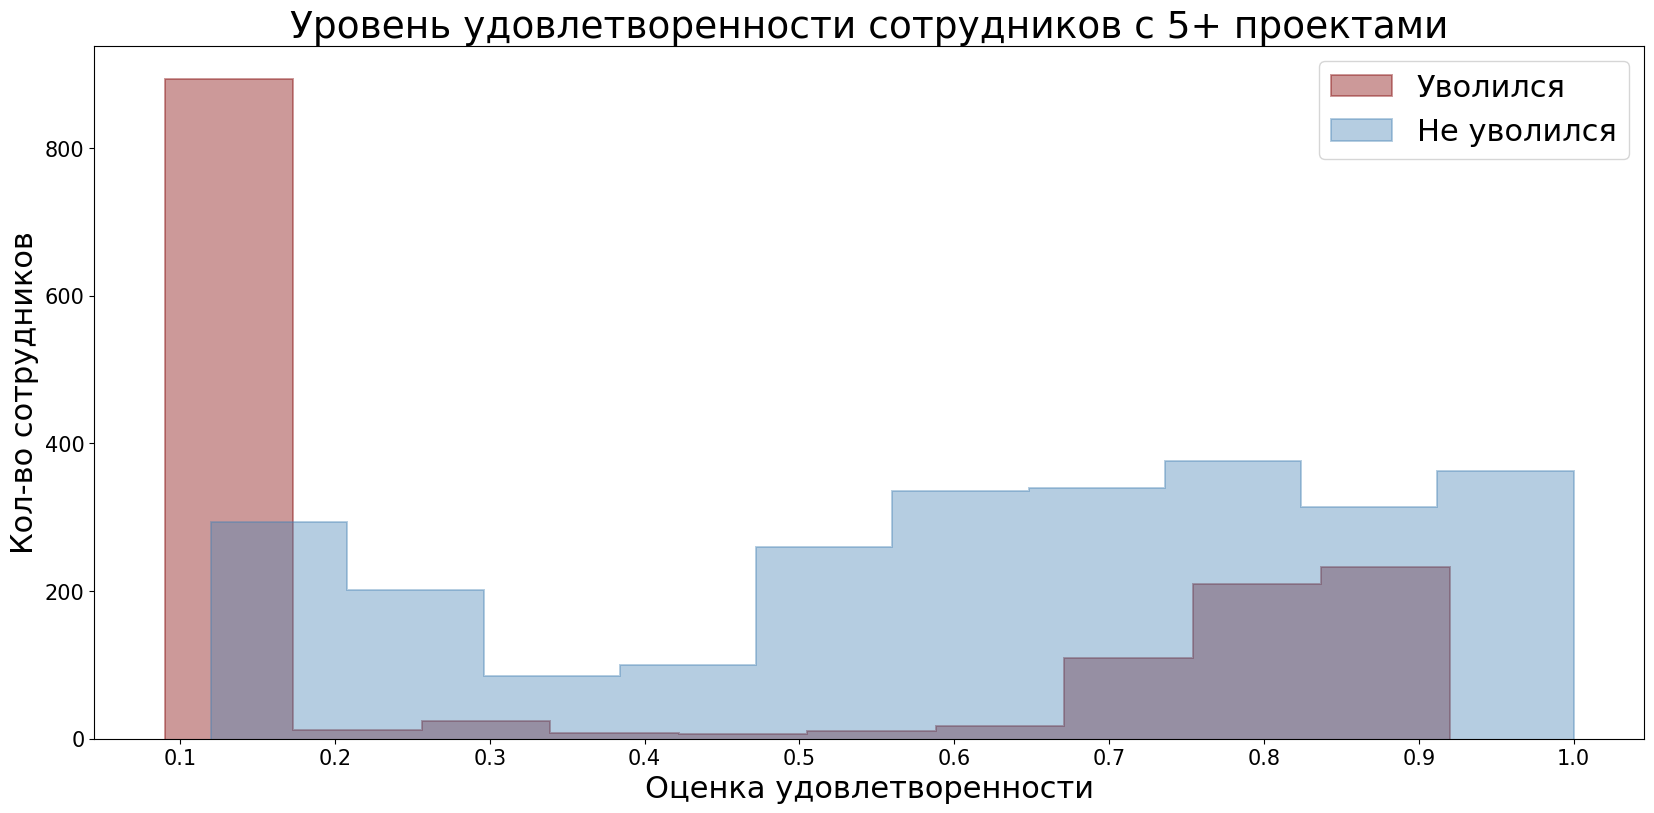

In [71]:
#this chart shows the satisfaction level of those who have >= 5 projects.

xlim=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

fig, ax = plt.subplots(1,1,figsize=(20,9))
ax.hist(tmp3_left['satisfaction_level'], fill=True,bins=10,color='maroon',edgecolor='maroon', histtype='step',linewidth=1.4, alpha=0.4)
ax.hist(tmp3_noleft['satisfaction_level'], fill=True,bins=10,color='steelblue',edgecolor='steelblue', histtype='step',linewidth=1.4, alpha=0.4)
plt.title('Уровень удовлетворенности сотрудников с 5+ проектами', fontsize=27)
plt.xlabel('Оценка удовлетворенности', fontsize=22)
plt.ylabel('Кол-во сотрудников', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(xlim)
ax.legend(['Уволился','Hе уволился'], fontsize=22);

In [72]:
# tmp3_left['satisfaction_level'].mean()
# tmp3_left['last_evaluation'].mean()
# tmp3_left['promotion_last_5years'].value_counts()
# tmp3_left['average_montly_hours'].mean()
# tmp3_noleft.last_evaluation.mean()

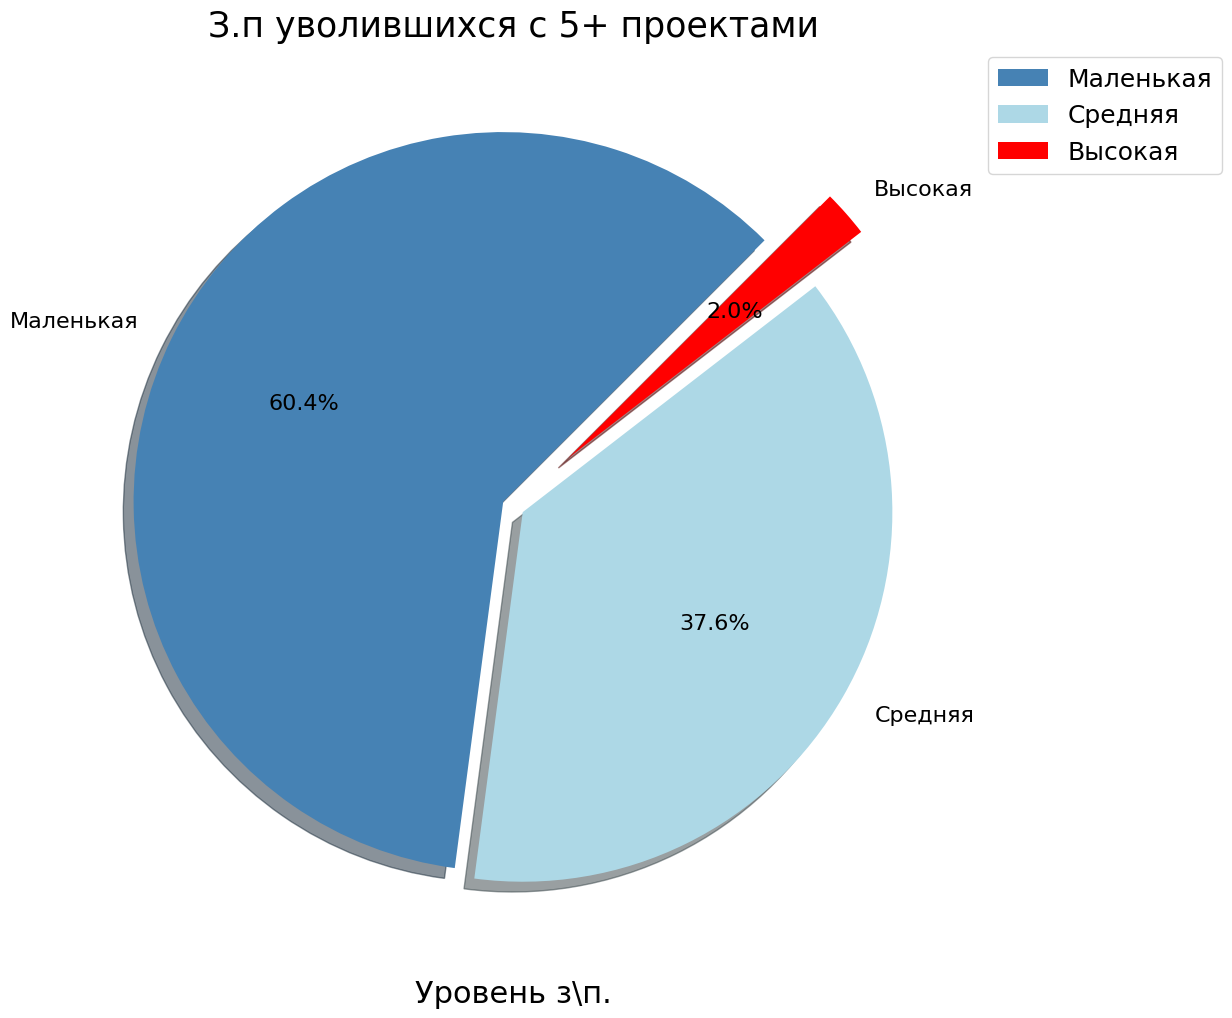

In [73]:
#salary of those who have 5+ projects

fig, ax = plt.subplots(figsize=(18,12))
c=['steelblue','lightblue','red']
plt.pie(tmp3_left['salary'].value_counts(), labels=['Маленькая','Средняя',
                                                   'Высокая'], explode=[0.03, 0.03, 0.2], 
        autopct = '%1.1f%%', shadow=True, startangle= 45, colors=c, counterclock=True,textprops={'fontsize': 16})
plt.title('З.п уволившихся с 5+ проектами', fontsize=25)
plt.xlabel('Уровень з\п.', fontsize=22)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=18);

Лишь у ~ 2% сотрудников высокая заработная плата.

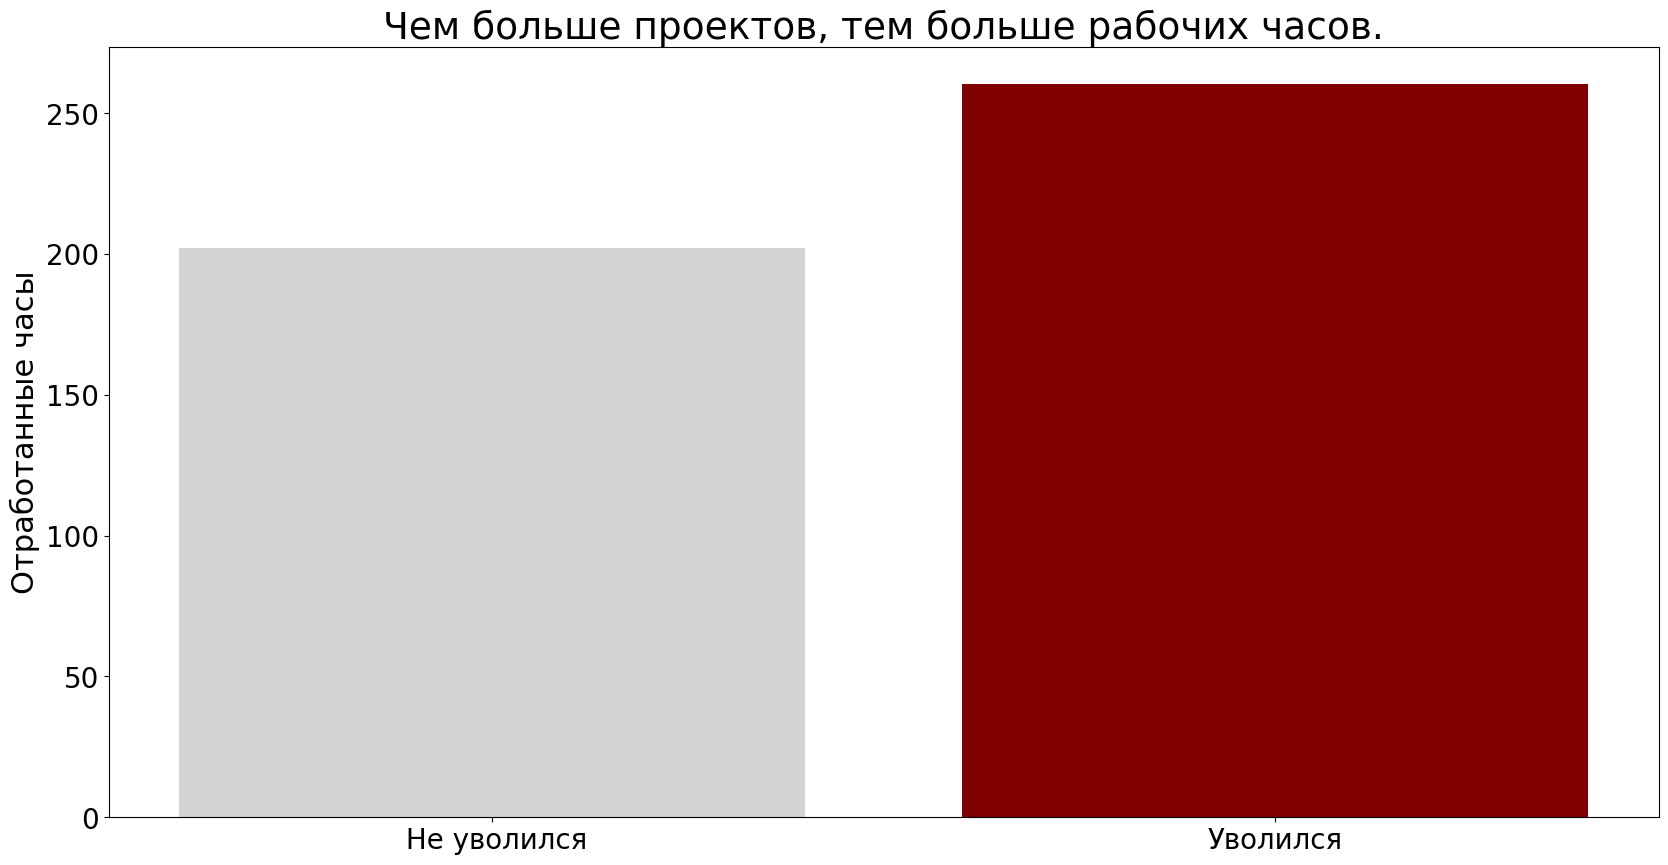

In [74]:
#those who have 5+ projects..

c=['lightgray','maroon']
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(temp_yes_no['name'].to_list(), temp_yes_no['average_montly_hours'].to_list(),color=c)
plt.xlabel('')
plt.ylabel('Отработанные часы', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.title('Чем больше проектов, тем больше рабочих часов.', fontsize=27);

Сотрудники, которые уволились, имели свыше 5 проектов и отработали гораздо больше часов, нежели те, кто остался в компании.


<font size='4'> * Чем выше заработная плата у сотрудников, тем выше шанс, что они не уйдут из компании. </font>

# Выводы по EDA:

1. Требуется уделить особое внимание тем, кто имеют по 2 проекта и пришел относительно недавно, так как текучесть среди них огромная. Причнами их увольнения могут послужить: <br>
     - Низкая оценка со стороны работодателя. Она составляет ~ 52%. Как результат у сотрудника может произойти демотивация ;<br>
     - Неудовлетворенность. Она составляет 41%.
     - Уровень з\п. У 61% сотрудников низкая заработная плата.<br><br>
2. Необходимо также обратить внимание на тех, кто имеют более 6 проектов и работают 4 года.<br>
    - Неудовлетворенность. Средняя оценка удовлетворенности среди сотрудников составляет 11%, хотя работодатели вполне довольны этими сотрудниками (на 86%);<br>
    - Продвижение. За последние 5 лет, только у 3 сотрудников из 769 было повышение на работе; <br>
    - Уровень з\п. Среди этих сотрудников всего у 1% сотрудников высокая зарплата;<br>
    - Переработка. В среднем уволившиеся сотрудники работают по 275 часов в месяц, в то время, как неуволенные 199 ч. <br>
    
P.S. Чтобы точнее указать проблему неудовлетворенности среди сотрудников и сказать с большей точностью почему они покидают компанию, нам необходимо иметь больше информации о сотрудниках. Например, можно было упомянуть возраст, удовлетворенность командой\командной работой, дистанция от дома до работы, наличие удаленной работы и т.д <br>

In [75]:
# #those who left/have only 2 projects

# print('salary of those who left with 2 proj:\n\n' ,temp_left.salary.value_counts(normalize=True))
# temp_left.salary.value_counts(normalize=True)
# temp_left.satisfaction_level.mean()
# temp_left.last_evaluation.mean()

In [76]:
# #for those who left & have >= 6 projects & work for 4 years
# tmp3 = data[(data['left']==1)&(data['number_project']>=6)&(data['time_spend_company']==4)]

# print('satisfaction level of those who have >=6 proj and work for 4 y.: ',tmp3.satisfaction_level.mean())
# print('last evaluation of those who have >= 6 proj.. : ',tmp3.last_evaluation.mean())
# print('avg mnth. hrs of those who have >= 6 proj.. : ',tmp3.average_montly_hours.mean())
# print('avg hrs of those who didn`t leave the comp: ',df_no.average_montly_hours.mean())
# print('satisfaction level of those who didn`t leave the company: ',df_no.satisfaction_level.mean())

# tmp3['promotion_last_5years'].value_counts()
# tmp3.salary.value_counts(normalize=True)

# Machine_Learning 

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [78]:
data['salary'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)

In [79]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [80]:
data['sales'].replace({'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5,'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9}, inplace=True)

In [81]:
data.head(40)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0


In [82]:
#pd.get_dummies(data=data, columns=['sales'], prefix=None, prefix_sep='_')

- Задачей было создать модель машинного обучения, для отдела HR с целью понять уволится сотрудник или нет. 
- Модель машинного обучения поможет заранее предсказывать, когда сотрудник соберется покинуть компанию. В таком случае, HR специалист сможет вовремя отреагировать и предпринять меры по повышению удовлетворенности работника и его удержанию.
- Данные были чистые мы только преобразовали текстовые данные  в числа, ведь это одно из правил работы в машинном обучении.
- сотрудник уволится или нет (0 - нет, 1 - да)


In [83]:
#data = pd.get_dummies(data=data, columns=['sales'], prefix=None, prefix_sep='_')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [85]:
X = data.drop('left', axis=1)
y = data.loc[:, 'left']

- Делим датасет на независимые и зависимые данные

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

- Делим данные для обучения 80% и тестирования 20% 

# Случайный лес

In [87]:
rfc = RandomForestClassifier(criterion='gini',
                                 n_estimators=7,
                                 random_state=1, 
                                 n_jobs=2)

In [88]:
rfc.fit(X_train.values, y_train.values)
y_pred_rfc = rfc.predict(X_test.values)

In [89]:
print("Recall:", recall_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Accuracy:", accuracy_score(y_test,y_pred_rfc))

Recall: 0.9603399433427762
Precision: 0.9883381924198251
Accuracy: 0.988


In [90]:
RandomForest = pd.Series({"Recall": recall_score(y_test, y_pred_rfc),
                "Precision": precision_score(y_test, y_pred_rfc),
                "Accuracy": accuracy_score(y_test, y_pred_rfc)}, name='RandomForest')

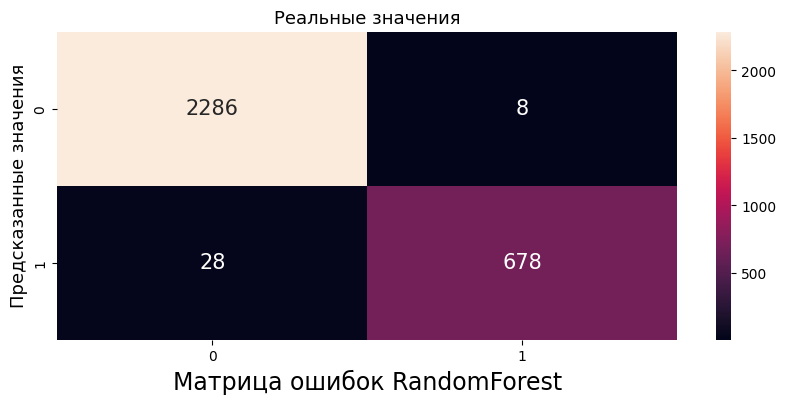

In [91]:
fig, (ax) = plt.subplots(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), ax=ax, annot=True, fmt='g',  annot_kws={"fontsize":15})
ax.set_xlabel('Матрица ошибок RandomForest', fontsize=17)
ax.set_ylabel('Предсказанные значения', fontsize=13)
ax.set_title('Реальные значения', fontsize=13)
plt.show()

- Наша модель работает правильно по диагонали (2286, 678).Это когда мы правильно угадываем тех, кто уходит и остается. 
- Наша цель состоит в том, чтобы МАКСИМИЗИРОВАТЬ метрики Recall. Это значит, что нам надо максимально снизить ложно негативные ошибки, когда модель случайно ошибается, что человек остается, но на самом деле он уходит. Это те ячейки матрицы с цифрами 462 и 60.  
- Если посмотрите на значения Recall, то видно, что DecisionTree работает намного лучше чем LogisticRegression, но если смотреть на все 4 матрице, то лучшей можно назвать RandomForest.
- Сравнивая ответы четырех матриц, мы видим, что LogisticRegression справился хуже, потому что это ЛИНЕЙНАЯ модель, которая пытается обнаружить какие-то ЛИНЕЙНЫЕ связи в данных.
- Как оказалось, наш датасет намного сложнее и поэтому с работой лучше справился алгоритм RandomForest. Все потому, что RandomForest может находить НЕЛИНЕЙНЫЕ связи в данных и поэтому справляется лучше. 

Деплоинг

In [92]:
import pickle

In [93]:
pickle_out = open("HR.pkl", "wb")

In [94]:
pickle.dump(rfc,pickle_out)

In [95]:
pickle_out.close()